## Bike Sharing Analysis and graphs

### Load dependencies

In [36]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline


### Load the datasets

In [37]:
data_dir = Path.cwd()

day_df = pd.read_csv(data_dir / 'day.csv', parse_dates=['dteday'])
hour_df = pd.read_csv(data_dir / 'hour.csv', parse_dates=['dteday'])

#make a normal timeline 2011-01-01 08:00:00
hour_df['datetime'] = hour_df['dteday'] + pd.to_timedelta(hour_df['hr'], unit='h')


### Hour overview

In [38]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [39]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN


### Days overview

In [40]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Data preparation for visualization

In [42]:
# Create proper month labels and aggregate monthly data
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
year_labels = {0: '2011', 1: '2012'}

# Prepare data with labels
day_df['month_label'] = day_df['mnth'].map(month_labels)
day_df['season_label'] = day_df['season'].map(season_labels)
day_df['year_label'] = day_df['yr'].map(year_labels)

# Prepare aggregated data
monthly_totals = day_df.groupby('mnth')['cnt'].sum().reset_index()
monthly_totals['month_label'] = monthly_totals['mnth'].map(month_labels)

season_totals = day_df.groupby('season')['cnt'].sum().reset_index()
season_totals['season_label'] = season_totals['season'].map(season_labels)

monthly_by_year = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
monthly_by_year['year_label'] = monthly_by_year['yr'].map(year_labels)
monthly_by_year['month_label'] = monthly_by_year['mnth'].map(month_labels)

hourly_profile = hour_df.groupby('hr')['cnt'].mean()

# Define season order and colors
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_colors = ['#89CFF0', '#90EE90', '#FFD700', '#FF8C00']


### Total rentals by month
Bar chart showing the total number of bike rentals for each month across 2011-2012, revealing seasonal patterns.

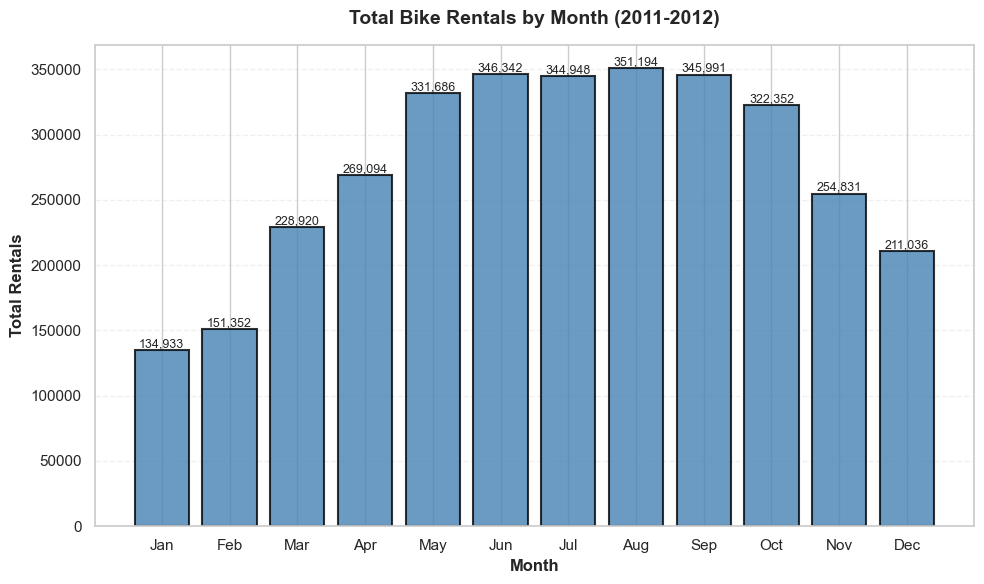

In [43]:
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_totals['month_label'], monthly_totals['cnt'], 
               color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('Total Bike Rentals by Month (2011-2012)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Rentals', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Total rentals by season
Bar chart comparing bike rental totals across the four seasons, showing which season has the highest demand.

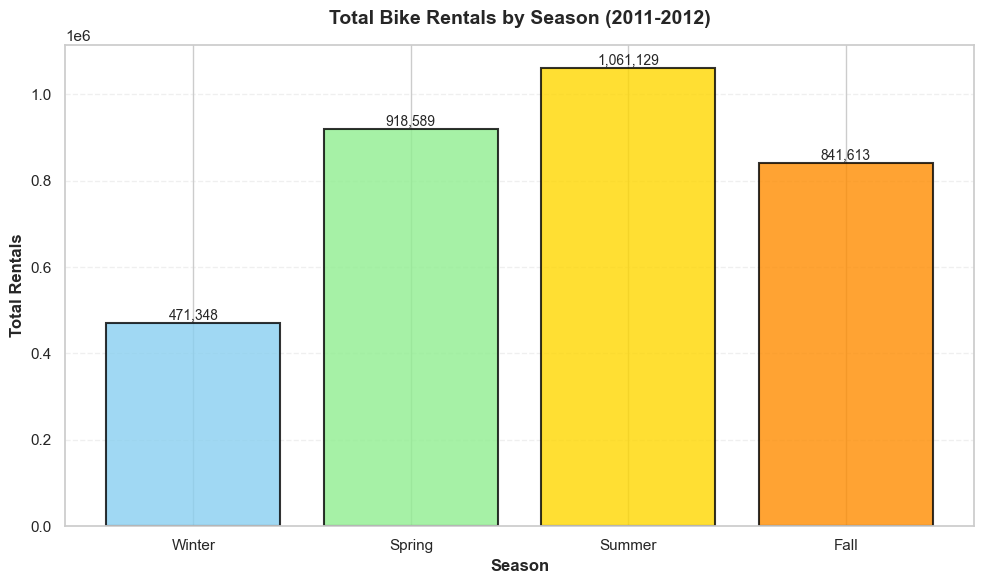

In [44]:
plt.figure(figsize=(10, 6))
season_totals_ordered = season_totals.set_index('season_label').reindex(season_order).reset_index()
bars = plt.bar(season_totals_ordered['season_label'], season_totals_ordered['cnt'],
               color=season_colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('Total Bike Rentals by Season (2011-2012)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12, fontweight='bold')
plt.ylabel('Total Rentals', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Monthly rentals comparison: 2011 vs 2012
Line chart comparing monthly rental patterns between 2011 and 2012, showing year-over-year growth trends.

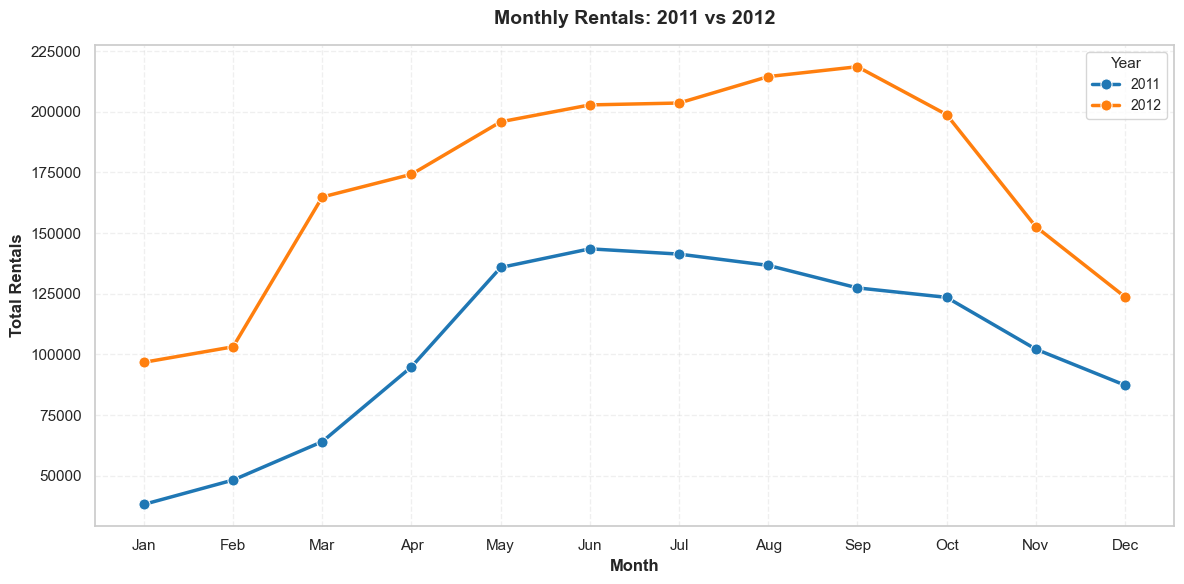

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_by_year, x='month_label', y='cnt', hue='year_label',
             marker='o', linewidth=2.5, markersize=8, palette=['#1f77b4', '#ff7f0e'])
plt.title('Monthly Rentals: 2011 vs 2012', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Rentals', fontsize=12, fontweight='bold')
plt.legend(title='Year', fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Average hourly demand
Line chart showing average bike rentals by hour of day, revealing peak usage times and daily patterns.

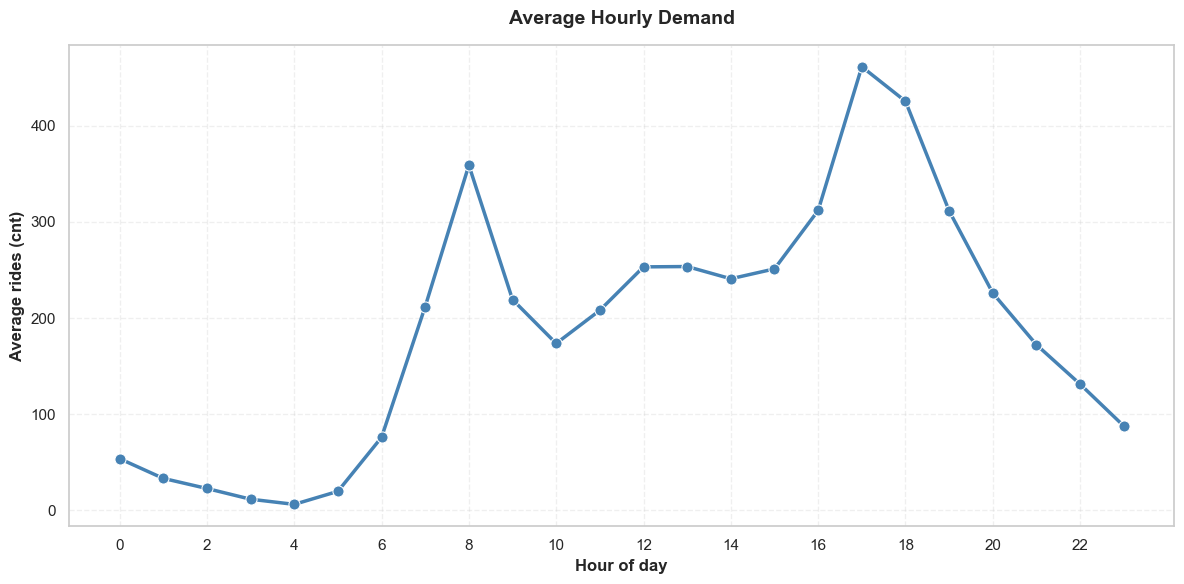

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_profile.index, y=hourly_profile.values, marker='o', 
             linewidth=2.5, markersize=8, color='steelblue')
plt.xticks(range(0, 24, 2))
plt.title('Average Hourly Demand', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Hour of day', fontsize=12, fontweight='bold')
plt.ylabel('Average rides (cnt)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Hourly demand: Workdays vs Holidays
Line chart comparing average hourly bike rentals between working days and holidays, showing different usage patterns.

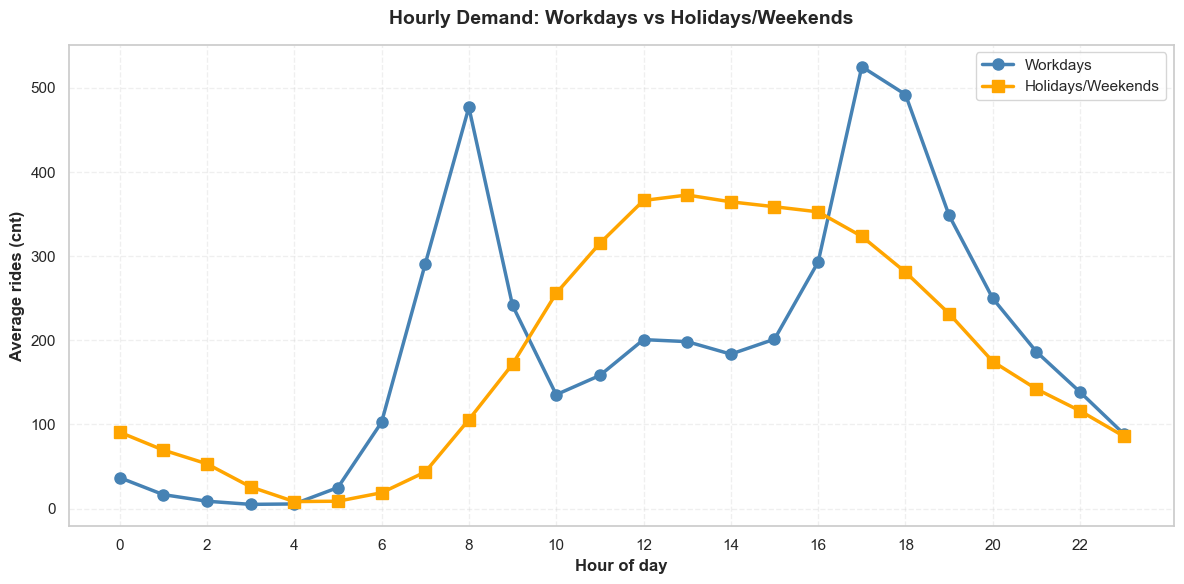

Workday peak hour: 17:00 (525 average rides)
Holiday/Weekend peak hour: 13:00 (373 average rides)


In [47]:
# Separate data by workingday (0 = holiday/weekend, 1 = workday)
hourly_workday = hour_df[hour_df['workingday'] == 1].groupby('hr')['cnt'].mean()
hourly_holiday = hour_df[hour_df['workingday'] == 0].groupby('hr')['cnt'].mean()

# Create the comparison plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_workday.index, hourly_workday.values, marker='o', 
         linewidth=2.5, markersize=8, color='steelblue', label='Workdays')
plt.plot(hourly_holiday.index, hourly_holiday.values, marker='s', 
         linewidth=2.5, markersize=8, color='orange', label='Holidays/Weekends')

plt.xticks(range(0, 24, 2))
plt.title('Hourly Demand: Workdays vs Holidays/Weekends', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Hour of day', fontsize=12, fontweight='bold')
plt.ylabel('Average rides (cnt)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print peak hours
workday_peak = hourly_workday.idxmax()
holiday_peak = hourly_holiday.idxmax()
print(f"Workday peak hour: {workday_peak}:00 ({hourly_workday.max():.0f} average rides)")
print(f"Holiday/Weekend peak hour: {holiday_peak}:00 ({hourly_holiday.max():.0f} average rides)")

### Visualize target distribution
A histogram of total rides (`cnt`) in the daily data highlights seasonality and spread.

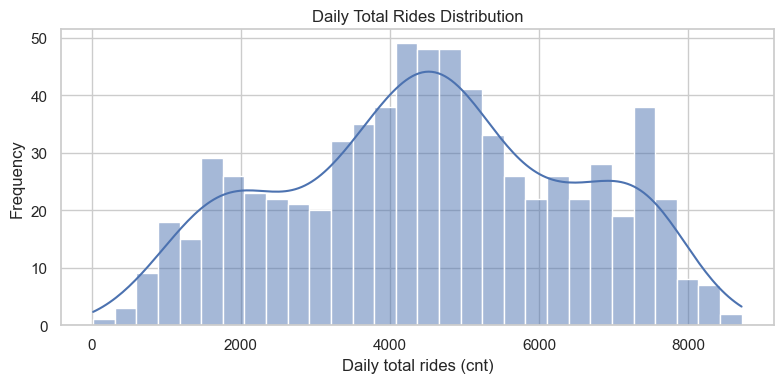

In [48]:
plt.figure(figsize=(8, 4))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Daily Total Rides Distribution')
plt.xlabel('Daily total rides (cnt)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Correlation heatmap
Heatmap showing correlations between numeric variables to identify relationships between features.

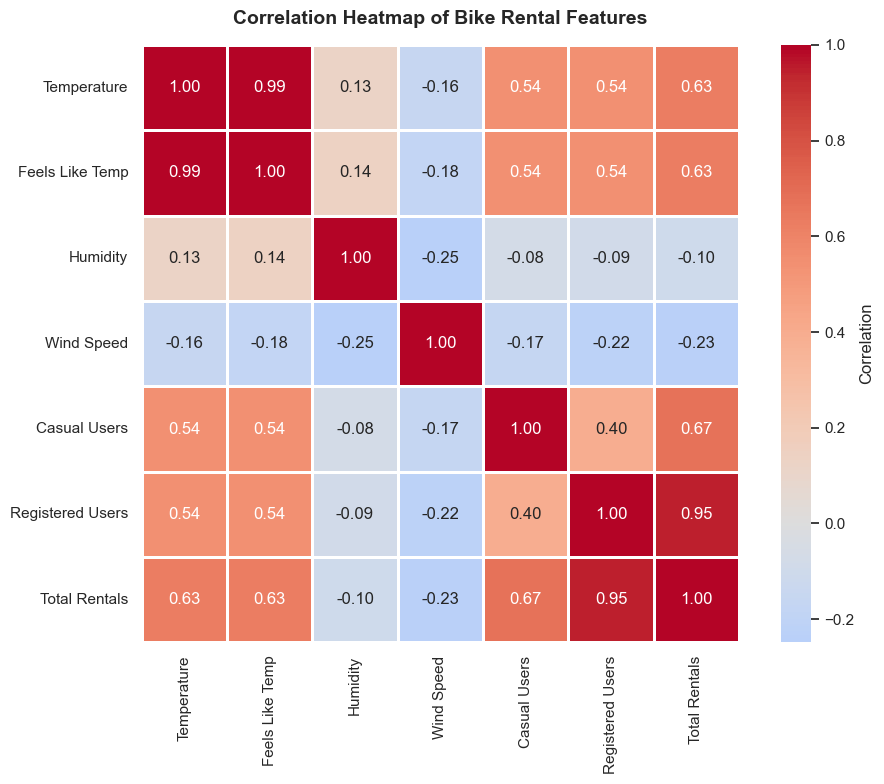

In [49]:
# Select relevant numeric columns for correlation analysis
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = day_df[numeric_cols].corr()

# Create more readable labels
readable_labels = {
    'temp': 'Temperature',
    'atemp': 'Feels Like Temp',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Casual Users',
    'registered': 'Registered Users',
    'cnt': 'Total Rentals'
}

# Rename for display
correlation_matrix_renamed = correlation_matrix.rename(index=readable_labels, columns=readable_labels)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_renamed, 
            annot=True,  # Show correlation values
            fmt='.2f',   # Format to 2 decimal places
            cmap='coolwarm',  # Color scheme
            center=0,    # Center colormap at 0
            square=True, # Make cells square-shaped
            linewidths=1,  # Add gridlines
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap of Bike Rental Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


### Time-based features correlation
Analyzing how time-based features (hour, day, month, year) correlate with bike rentals.

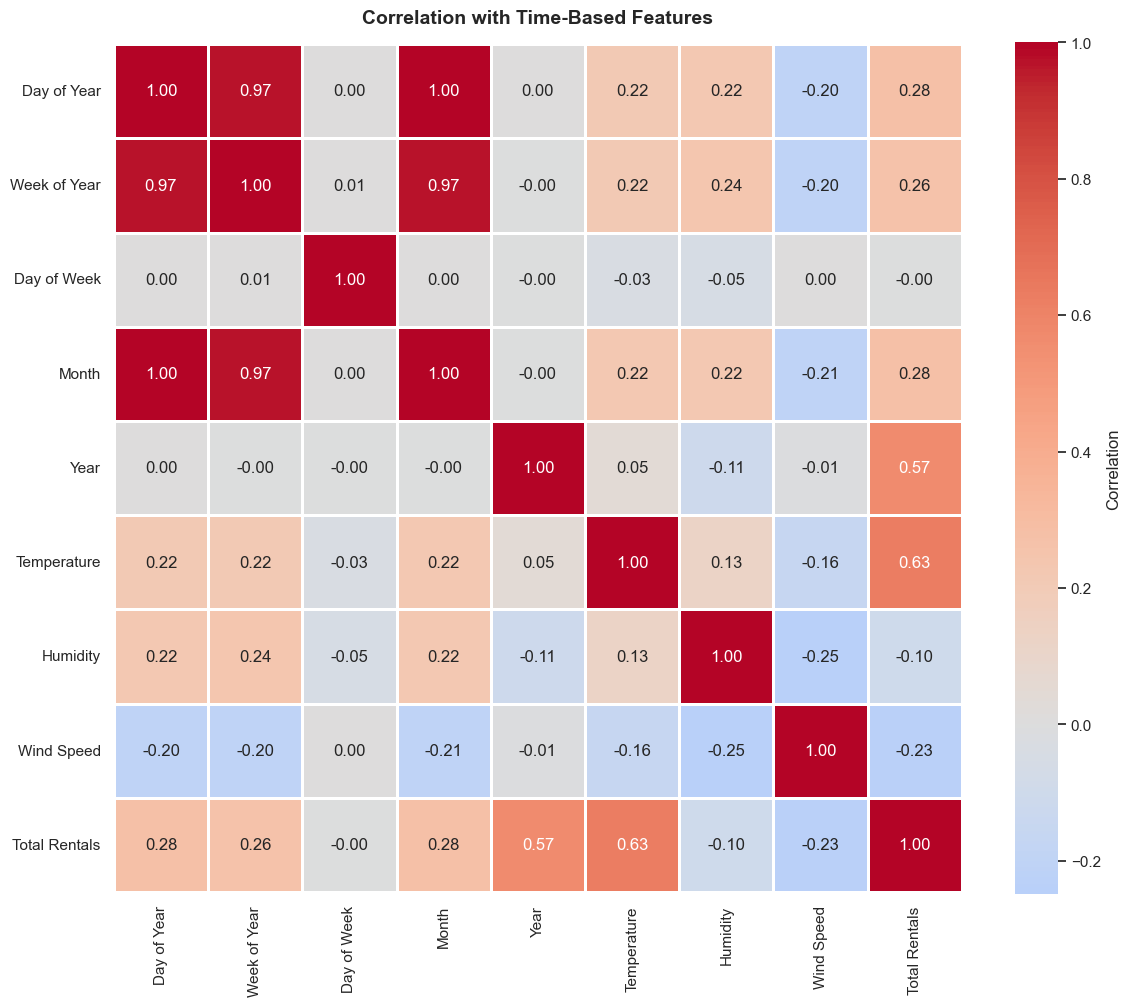

In [50]:
# Extract time-based numeric features from datetime
day_df['day_of_year'] = day_df['dteday'].dt.dayofyear  # 1-365
day_df['day_of_week'] = day_df['dteday'].dt.dayofweek  # 0=Monday, 6=Sunday
day_df['week_of_year'] = day_df['dteday'].dt.isocalendar().week  # 1-52

# Select columns including time features
time_cols = ['day_of_year', 'week_of_year', 'day_of_week', 'mnth', 'yr', 
             'temp', 'hum', 'windspeed', 'cnt']
time_correlation = day_df[time_cols].corr()

# Create readable labels
time_labels = {
    'day_of_year': 'Day of Year',
    'week_of_year': 'Week of Year',
    'day_of_week': 'Day of Week',
    'mnth': 'Month',
    'yr': 'Year',
    'temp': 'Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'cnt': 'Total Rentals'
}

time_correlation_renamed = time_correlation.rename(index=time_labels, columns=time_labels)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(time_correlation_renamed, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation with Time-Based Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


### Rentals by day of week
Bar chart showing average bike rentals for each day of the week to see if weekends differ from weekdays.

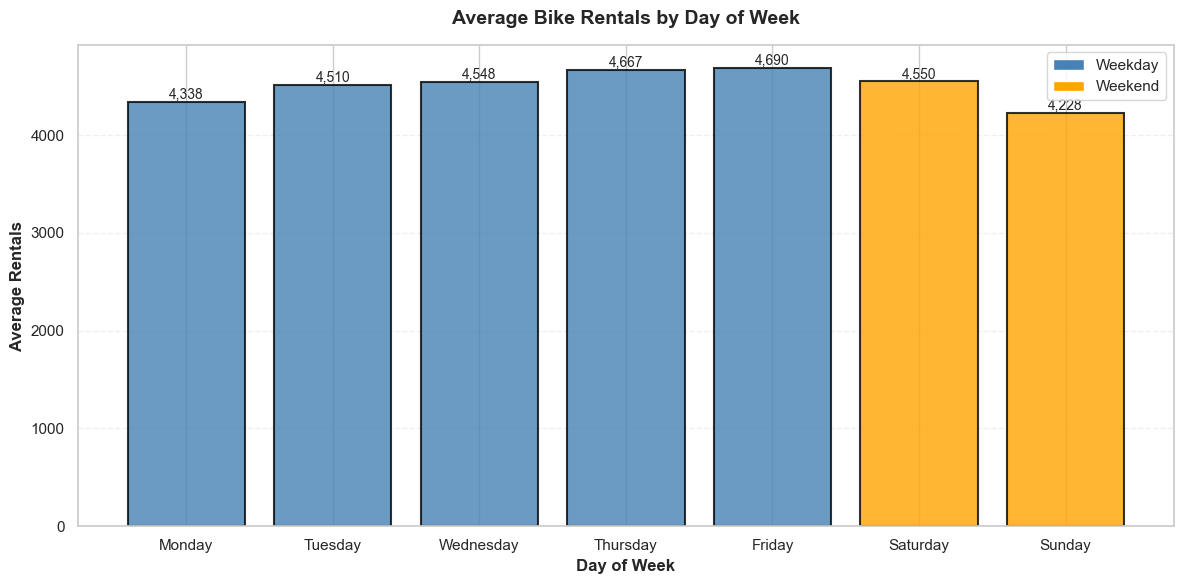

Average Weekday Rentals: 4,551
Average Weekend Rentals: 4,390
Difference: 161 (3.5%)


In [51]:
# Create day of week labels
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_df['day_name'] = day_df['day_of_week'].map(day_names)

# Calculate average rentals by day of week
daily_avg = day_df.groupby(['day_of_week', 'day_name'])['cnt'].mean().reset_index()

# Define colors: weekdays vs weekends
colors = ['steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'orange', 'orange']

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(daily_avg['day_name'], daily_avg['cnt'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('Average Bike Rentals by Day of Week', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Average Rentals', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', label='Weekday'),
                   Patch(facecolor='orange', label='Weekend')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Print statistics
weekday_avg = day_df[day_df['day_of_week'] < 5]['cnt'].mean()
weekend_avg = day_df[day_df['day_of_week'] >= 5]['cnt'].mean()
print(f"Average Weekday Rentals: {weekday_avg:,.0f}")
print(f"Average Weekend Rentals: {weekend_avg:,.0f}")
print(f"Difference: {abs(weekday_avg - weekend_avg):,.0f} ({abs(weekday_avg - weekend_avg)/weekday_avg*100:.1f}%)")
